# Assignment 4
### Do three of six.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data
- Use the above function `simulate` to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## statistic to bootstrap:
def stat(x):
    stat = np.mean(x) #using mean
    return stat

In [4]:
# simulation code for resampling with explainations line by line
def simulate(var, df, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var] # for each features in the df

    estimates = []
    for s in range(S):
        # Draw a new sample of 100% of the original series, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

In [6]:
# Open College Completion data
df = pd.read_csv('nhanes_data_17_18.csv')
df

/var/folders/x9/1cmzmrvn09nc1bqthfg5jkk80000gn/T/ipykernel_53282/2557489166.py:2: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


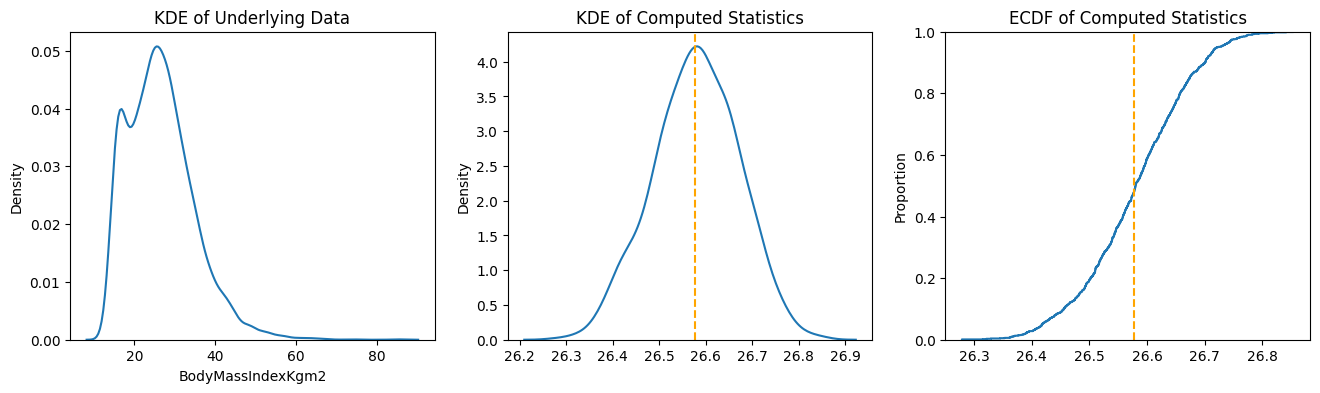

Variance of estimates is: 0.008464084528830185


In [8]:
# Using simulate function to get estimate on a few variables
var = 'Overall Survival (Months)'
estimates = simulate(var, df, stat)


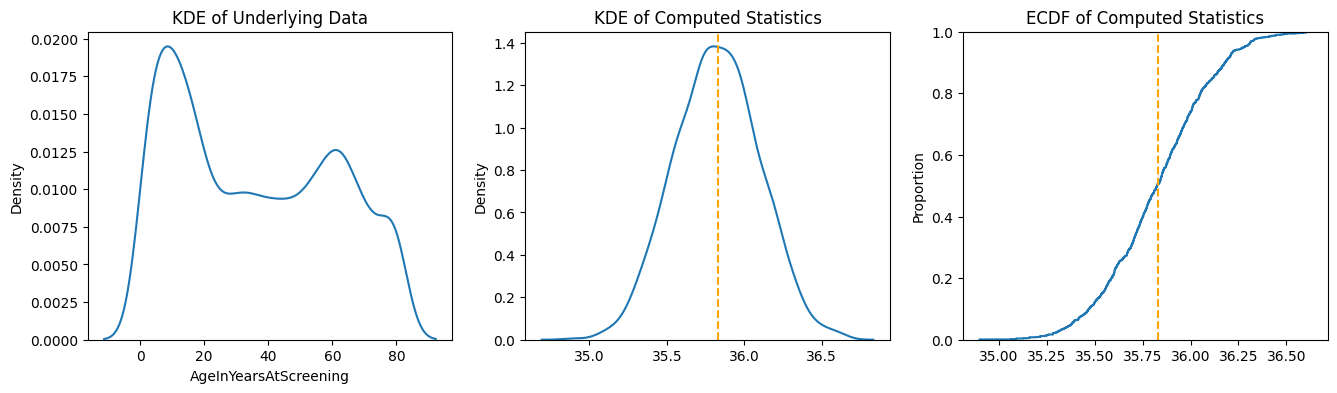

Variance of estimates is: 0.07434857771329359


In [9]:
var = 'AgeInYearsAtScreening'
estimates = simulate(var, df, stat)

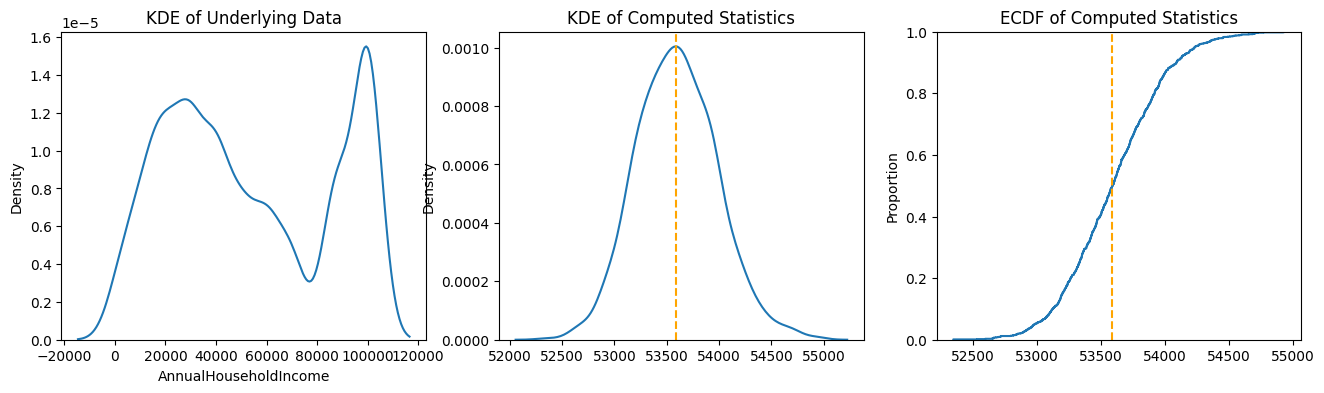

Variance of estimates is: 147431.75595490402


In [10]:
var = 'AnnualHouseholdIncome'
estimates = simulate(var, df, stat)

In [14]:
# define a new function with interval
def interval(L, H, estimates):
    '''
    Compute the L and H quantiles from bootstrap estimates and optionally print them.

    Parameters:
    - L: lower quantile (e.g. 0.05)
    - H: upper quantile (e.g. 0.95)
    - estimates: array-like of bootstrap estimates

    Returns:
    (interval_L, interval_H)
    '''
    interval_L = np.quantile(estimates, L)
    interval_H = np.quantile(estimates, H)
    return interval_L, interval_H

In [16]:
# try this with 0.05 and 0.95 interval, ie computing the 90% interval
L = 0.05
H = 0.95
interval_L, interval_H = interval(L, H, estimates)
print(f'90% confidence interval for the statistic: [{interval_L:.2f}, {interval_H:.2f}]')
print(f'The lower bound at quantile {L} is {interval_L:.2f}')
print(f'The upper bound at quantile {H} is {interval_H:.2f}')

90% confidence interval for the statistic: [52983.57, 54229.67]
The lower bound at quantile 0.05 is 52983.57
The upper bound at quantile 0.95 is 54229.67


### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

### Exercise 5
- Extend the `kde` class by adding a method to do bandwidth selection using a simple train-test split
- Extend the `kde` class by adding a method to do bandwidth seleciton by $k$-fold cross validation

### Exercise 6
In this exercise, you're going to do for LCLS what we just did for KDE: Pick the bandwidth 

Recall, the LCLS estimator is
$$
\hat{y}_{N,h}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}.
$$
- Select two numeric variables from a data set. Split the data into training and test sets.
- Write a `predict(X_{train},Y_{train},X_{train})` function/method that takes a set of values $X_{test}$ and data $(X_{train},Y_{train})$, and computed predicted values $\hat{y}(X_{test})$ 
- Write a function/method that selects the bandwidth by **minimizing** the **mean squared error** of the squared differences between $\hat{y}(x_j)$ and $y_j$ on the test set:
$$
MSE(h) = \frac{1}{N_{test}} \sum_{j=1}^{N_{test}} (y_j - \hat{y}_{N_{train},h}(x_j))^2
$$
Be sure you understand what's happening here: The training data are used to make predictions for each test observation $x_j$, and then the prediction $\hat{y}(x_j)$ and true value $y_j$ are compared using squared difference

In [ ]:
# Exercise 2: Invitation to Inference
# Step 1: Load the simulation function from our course materials
# This function performs bootstrapping to estimate sampling distributions

def simulate(var, df, fcn, S=1000, plot=True):
    ''' 
    Bootstrap simulation code to estimate sampling distribution of a statistic.
    
    Parameters:
    - var: column name in dataframe
    - df: pandas dataframe containing the data
    - fcn: function to compute the statistic (e.g., mean, median, std)
    - S: number of bootstrap samples (default 1000)
    - plot: whether to create visualization plots
    
    Returns:
    - estimates: array of bootstrap estimates
    '''
    
    # Extract the variable of interest from the dataframe
    x = df[var]

    # Initialize list to store bootstrap estimates
    estimates = []
    
    # Perform bootstrap resampling S times
    for s in range(S):
        # Draw a new sample WITH REPLACEMENT (key concept!)
        # This mimics getting new data from the same population
        x_s = x.sample(frac=1.0, replace=True)
        
        # Compute the statistic on this bootstrap sample
        stat_s = fcn(x_s)
        
        # Store the estimate
        estimates.append(stat_s)
    
    # Convert to numpy array for easier computation
    estimates = np.array(estimates)

    # Create visualization if requested
    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))
        
        # Plot 1: KDE of original data
        sns.kdeplot(x, ax=axes[0]).set(title='KDE of Underlying Data')
        
        # Plot 2: KDE of bootstrap statistics with original estimate
        sns.kdeplot(estimates, ax=axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--', label='Original Estimate')
        
        # Plot 3: ECDF of bootstrap statistics
        sns.ecdfplot(estimates, ax=axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        
        plt.tight_layout()
        plt.show()
        
        # Print variance of estimates (measure of uncertainty)
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates


In [ ]:
# Step 2: Define a statistic to bootstrap
# Let's bootstrap the mean graduation rate (6-year completion rate)

def stat(x):
    '''Function to compute the statistic of interest (mean)'''
    return np.mean(x)

# Step 3: Use the simulate function to bootstrap the mean graduation rate
print("Bootstrapping the mean graduation rate...")
var = 'gradrate150_6yr'  # 6-year graduation rate column
estimates = simulate(var, df, stat, S=1000, plot=True)

print(f"Original mean graduation rate: {stat(df[var]):.4f}")
print(f"Bootstrap mean: {np.mean(estimates):.4f}")
print(f"Standard error: {np.std(estimates):.4f}")


In [ ]:
# Step 4: Create the interval function to compute confidence intervals
def interval(L, H, estimates):
    '''
    Compute confidence interval from bootstrap estimates.
    
    Parameters:
    - L: Lower quantile (e.g., 0.05 for 5th percentile)
    - H: Upper quantile (e.g., 0.95 for 95th percentile)  
    - estimates: Array of bootstrap estimates
    
    Returns:
    - tuple: (lower_bound, upper_bound) of confidence interval
    '''
    lower_bound = np.quantile(estimates, L)
    upper_bound = np.quantile(estimates, H)
    
    return lower_bound, upper_bound

# Step 5: Calculate 90% confidence interval
L = 0.05  # 5th percentile
H = 0.95  # 95th percentile

ci_lower, ci_upper = interval(L, H, estimates)

print(f"\n90% Confidence Interval for Mean Graduation Rate:")
print(f"Lower bound (5th percentile): {ci_lower:.4f}")
print(f"Upper bound (95th percentile): {ci_upper:.4f}")
print(f"Interval width: {ci_upper - ci_lower:.4f}")

# Interpretation
print(f"\nInterpretation:")
print(f"We are 90% confident that the true population mean graduation rate")
print(f"lies between {ci_lower:.4f} and {ci_upper:.4f}.")
print(f"This means if we repeated this experiment many times,")
print(f"90% of our confidence intervals would contain the true parameter.")


In [ ]:
# Bonus: Let's also bootstrap a different statistic - the median
print("\n" + "="*60)
print("BONUS: Bootstrapping the Median Graduation Rate")
print("="*60)

def median_stat(x):
    '''Function to compute the median'''
    return np.median(x)

# Bootstrap the median
median_estimates = simulate(var, df, median_stat, S=1000, plot=True)

# Calculate 90% confidence interval for median
median_ci_lower, median_ci_upper = interval(L, H, median_estimates)

print(f"\n90% Confidence Interval for Median Graduation Rate:")
print(f"Lower bound: {median_ci_lower:.4f}")
print(f"Upper bound: {median_ci_upper:.4f}")
print(f"Original median: {median_stat(df[var]):.4f}")

# Compare mean vs median confidence intervals
print(f"\nComparison:")
print(f"Mean CI width: {ci_upper - ci_lower:.4f}")
print(f"Median CI width: {median_ci_upper - median_ci_lower:.4f}")
print(f"The median has a {'narrower' if (median_ci_upper - median_ci_lower) < (ci_upper - ci_lower) else 'wider'} confidence interval")
print(f"This suggests the median is {'more' if (median_ci_upper - median_ci_lower) < (ci_upper - ci_lower) else 'less'} robust to outliers")
